In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
from PIL import Image

In [57]:
img = Image.open('image.jpg')
img

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [58]:
x = np.array(img, dtype = np.float32)
x

array([[[  0.,   1.,  10.],
        [  0.,   2.,  11.],
        [  0.,   2.,  11.],
        ..., 
        [ 22.,  29.,  39.],
        [ 22.,  29.,  39.],
        [ 22.,  29.,  39.]],

       [[  0.,   3.,  12.],
        [  0.,   3.,  12.],
        [  0.,   2.,  11.],
        ..., 
        [ 23.,  30.,  40.],
        [ 23.,  30.,  40.],
        [ 22.,  29.,  39.]],

       [[  1.,   4.,  13.],
        [  0.,   3.,  12.],
        [  0.,   3.,  12.],
        ..., 
        [ 25.,  29.,  40.],
        [ 22.,  29.,  39.],
        [ 22.,  29.,  39.]],

       ..., 
       [[ 57.,  59.,  56.],
        [ 57.,  59.,  56.],
        [ 58.,  60.,  57.],
        ..., 
        [ 38.,  47.,  56.],
        [ 37.,  46.,  55.],
        [ 33.,  42.,  51.]],

       [[ 58.,  60.,  57.],
        [ 60.,  62.,  59.],
        [ 61.,  63.,  60.],
        ..., 
        [ 38.,  47.,  56.],
        [ 36.,  45.,  54.],
        [ 33.,  42.,  51.]],

       [[ 60.,  60.,  58.],
        [ 62.,  62.,  60.],
        [ 6

In [59]:
x.dtype

dtype('float32')

In [60]:
x.shape

(1279, 1920, 3)

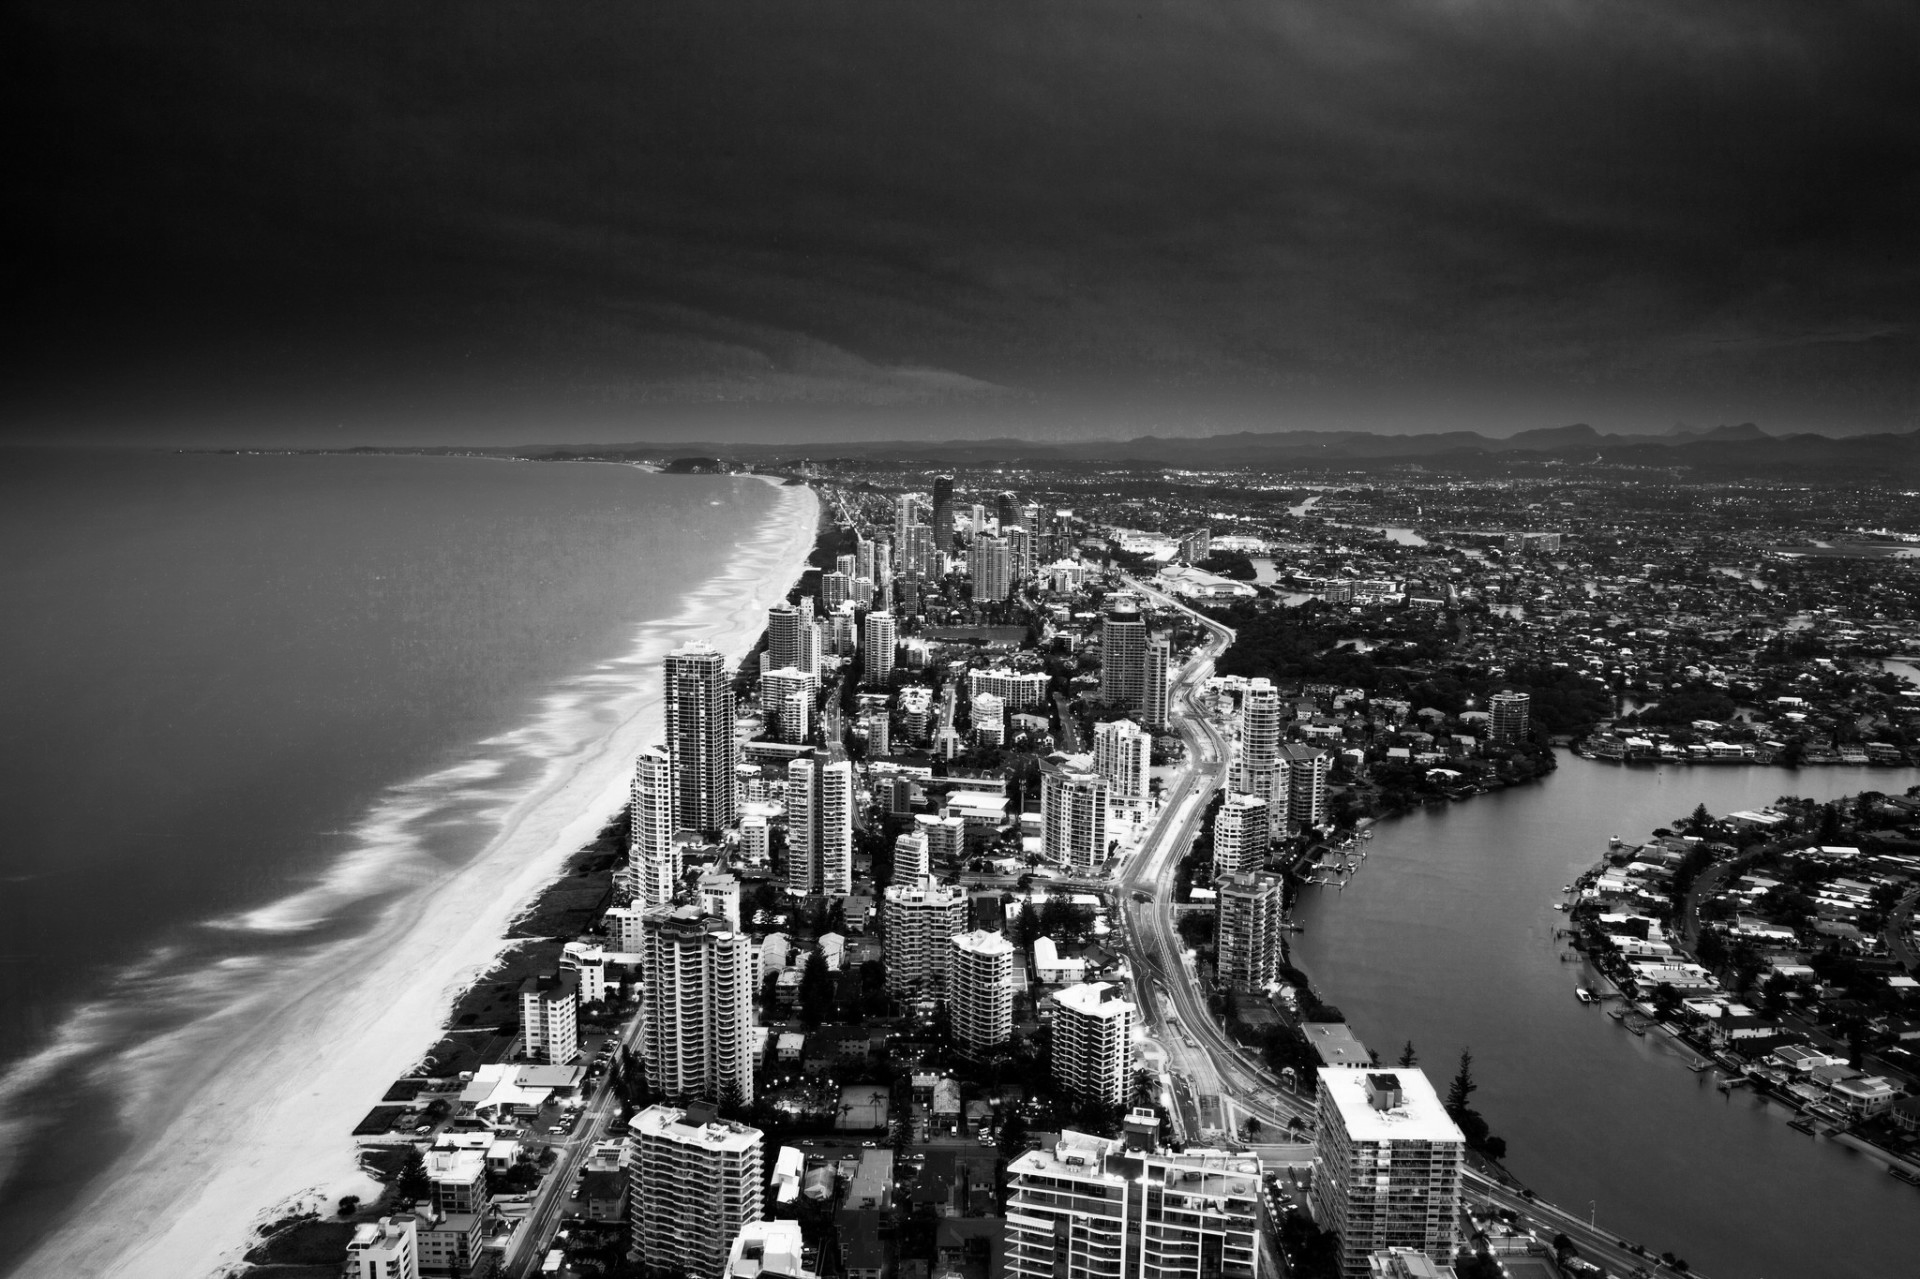

In [61]:
y = Image.fromarray(np.asarray(x.mean(axis = 2), dtype = np.uint8))
y

In [62]:
y = np.array(y, dtype = np.float32)
y

array([[  3.,   4.,   4., ...,  30.,  30.,  30.],
       [  5.,   5.,   4., ...,  31.,  31.,  30.],
       [  6.,   5.,   5., ...,  31.,  30.,  30.],
       ..., 
       [ 57.,  57.,  58., ...,  47.,  46.,  42.],
       [ 58.,  60.,  61., ...,  47.,  45.,  42.],
       [ 59.,  61.,  64., ...,  47.,  44.,  43.]], dtype=float32)

In [63]:
y.shape

(1279, 1920)

In [64]:
U, V, D = np.linalg.svd(y)

In [65]:
U.shape

(1279, 1279)

In [66]:
U

array([[-0.01558779, -0.0116489 , -0.01491525, ...,  0.0050262 ,
         0.0197242 ,  0.03724495],
       [-0.01571344, -0.01183102, -0.01494278, ...,  0.00689757,
        -0.02046061, -0.05727445],
       [-0.01578262, -0.01188299, -0.01480655, ..., -0.04358222,
         0.02136381,  0.05677036],
       ..., 
       [-0.02210819,  0.03287078,  0.04643327, ...,  0.00357766,
         0.00418108,  0.00364928],
       [-0.02140759,  0.03288468,  0.04082076, ..., -0.00299043,
        -0.00474553, -0.0015364 ],
       [-0.02077837,  0.03327031,  0.03373662, ..., -0.00046414,
         0.00255439,  0.00109272]], dtype=float32)

In [67]:
D.shape

(1920, 1920)

In [68]:
D

array([[-0.01243302, -0.01239829, -0.01238776, ..., -0.01135264,
        -0.0114644 , -0.01152645],
       [ 0.00531345,  0.0050517 ,  0.00487143, ..., -0.01438949,
        -0.01501567, -0.01517056],
       [ 0.01061993,  0.01057349,  0.01043667, ...,  0.01395589,
         0.01486372,  0.01481976],
       ..., 
       [ 0.02123276,  0.00169093,  0.00297665, ...,  0.37193656,
        -0.20436342,  0.01077788],
       [-0.04290361, -0.01680232,  0.0168009 , ..., -0.2031503 ,
         0.41746959, -0.18377228],
       [ 0.02076144, -0.0295684 , -0.02237994, ...,  0.04655747,
        -0.16855544,  0.21020955]], dtype=float32)

In [69]:
V

array([  1.27660930e+05,   2.92816250e+04,   2.14439824e+04, ...,
         4.84573698e+00,   4.82635212e+00,   4.68034935e+00], dtype=float32)

In [70]:
V.shape

(1279,)

In [71]:
y.shape

(1279, 1920)

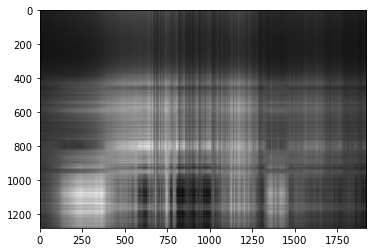

In [72]:
reconsty = np.matrix(U[:, :2]) * np.diag(V[:2]) * np.matrix(D[:2, :])
plt.imshow(reconsty, cmap = 'gray')
plt.show()

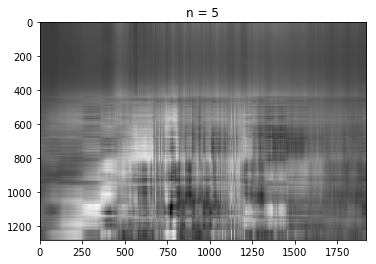

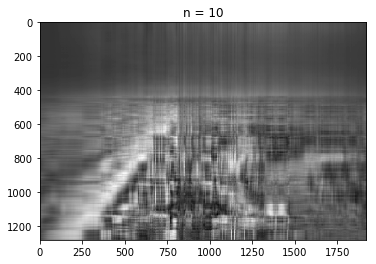

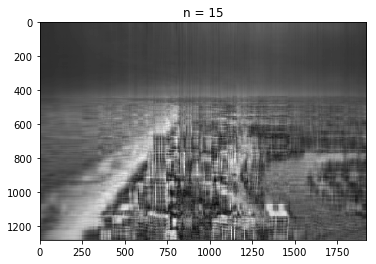

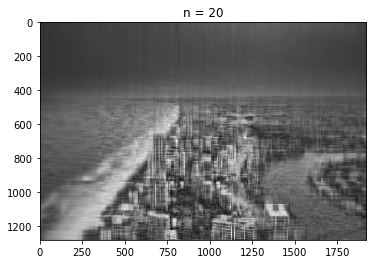

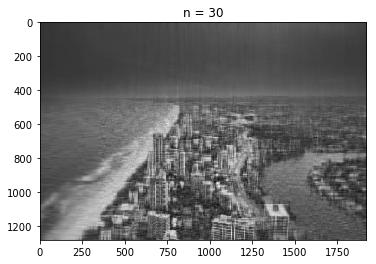

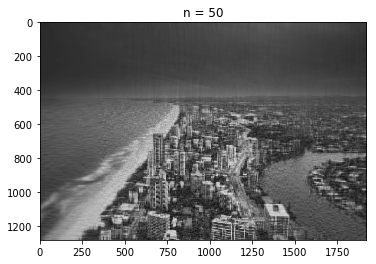

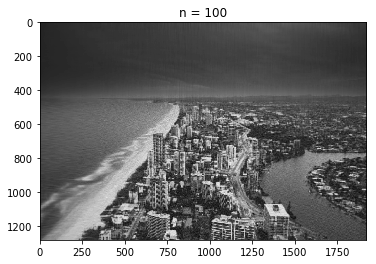

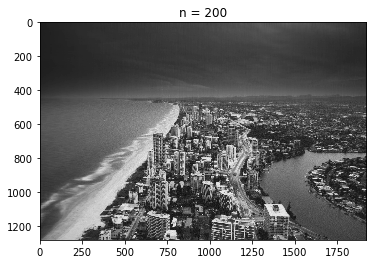

In [75]:
for i in [5, 10, 15, 20, 30, 50, 100, 200]:
    reconsty = np.matrix(U[:, :i]) * np.diag(V[:i]) * np.matrix(D[:i, :])
    plt.imshow(reconsty, cmap = 'gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()